In [15]:
%load_ext autoreload
%autoreload 2
%pylab inline

import sys
import glob
import pandas as pd
import os
import seaborn as sns
from tqdm import tqdm_notebook as tqdm
from statsmodels.distributions.empirical_distribution import ECDF
from collections import defaultdict
import pickle
from open_spiel.python.examples.ubc_nfsp_example import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


/apps/open_spiel/venv/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['logging', 'copy']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [16]:
series = []
experiment_dir = '/shared/outputs/'
EXPERIMENT = 'new_params'
for checkpoint_file in glob.glob(f'{experiment_dir}/{EXPERIMENT}/*/solving_checkpoints/checkpoint_latest.pkl'):
    with open(checkpoint_file, 'rb') as f:
        checkpoint = pickle.load(f)
        nash_conv_history = checkpoint['nash_conv_history']
        models = checkpoint['policy']
        series.append({
            'name': checkpoint['name'],
            'data': nash_conv_history,
            'models': models,
        })
    

No handles with labels found to put in legend.


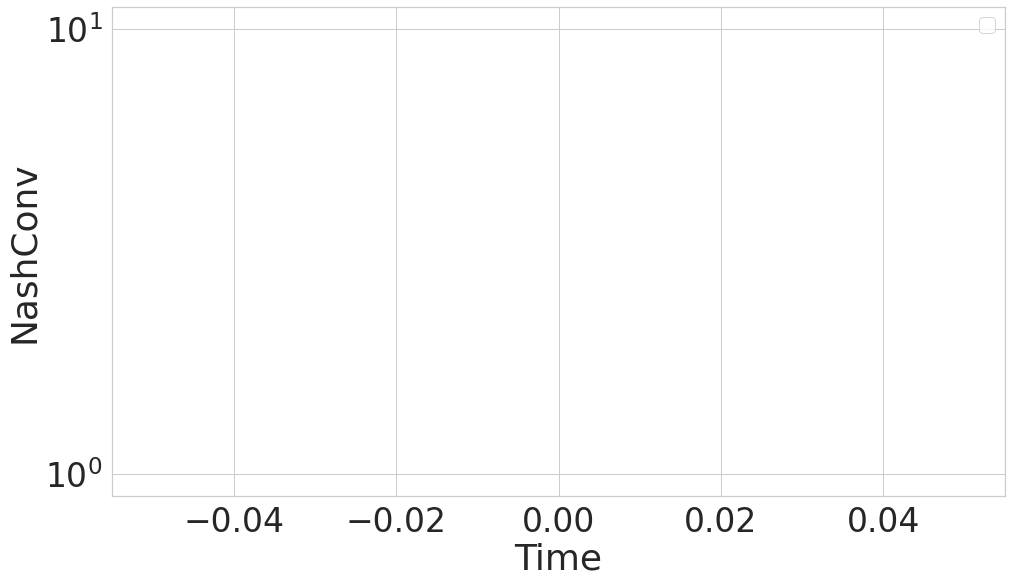

In [17]:
sns.set_theme(style="whitegrid", font_scale=3)
plt.figure(figsize=(16,9))
for s in series:
    x = [a[1] for a in s['data']]
    y = [a[2] for a in s['data']]
    plt.plot(x, y, label=s['name'], linewidth=3)
plt.ylabel('NashConv')
plt.xlabel('Time')
plt.semilogy()
plt.legend(fontsize=20)

In [5]:
series[0]

{'name': 'lstm_deep',
 'data': [(20000, 1145.884248495102, 151.18985798472175),
  (40000, 2519.598581314087, 24.271834794026134),
  (60000, 4221.903831958771, 15.005709188960452),
  (80000, 6058.494817972183, 8.748625534846926),
  (100000, 8056.755328655243, 7.902518865462245),
  (120000, 9878.874509334564, 8.50631435733252),
  (140000, 11737.385795354843, 9.724949771697368),
  (160000, 13637.972797632217, 3.9068633784574214),
  (180000, 15571.140285253525, 3.658036952501668),
  (200000, 17486.6640086174, 3.474321427902286),
  (220000, 19439.028946638107, 3.358061876195359),
  (240000, 21356.88160967827, 3.1324591133755586),
  (260000, 23358.68105983734, 3.043447900620251),
  (280000, 25406.820883512497, 2.820890266368968),
  (300000, 27345.650588035583, 2.680223774998648),
  (320000, 29275.316102981567, 2.6591973080970472),
  (340000, 31216.453110456467, 2.4709411690552052),
  (360000, 33172.05008864403, 2.467435368857233),
  (380000, 35107.148770570755, 2.3038504428181295),
  (400000

In [21]:
models

{0: {'q_network': OrderedDict([('rnn.weight_ih_l0',
                tensor([[-4.7102e-01, -9.8101e-02, -2.4016e-01, -1.3336e-01, -4.4170e-01,
                          2.0064e-01, -4.4820e-01, -3.1861e-02,  1.7381e-01, -1.6854e-01,
                          2.8371e-01,  6.3063e-02,  2.7485e-01,  3.2080e-01, -2.2072e-01,
                          1.8171e-01, -2.1633e-01,  1.5673e-01, -2.6124e-01,  2.3128e-01],
                        [ 1.0123e-01, -1.9567e-01, -2.4525e-01,  1.2937e-01,  4.6651e-01,
                          2.3995e-01, -4.8276e-02, -2.4269e-02,  2.8419e-01, -3.4672e-01,
                          1.6720e-01, -1.6568e-01,  2.8929e-01, -1.7836e-01,  2.4724e-02,
                          1.6884e-01,  3.4361e-01, -7.3492e-02,  4.5702e-01, -4.2231e-01],
                        [-8.9189e-02, -4.9859e-01,  4.1420e-02,  1.4189e-01, -2.0240e-01,
                          2.0766e-01, -8.1055e-02, -4.3449e-01,  3.8387e-01,  3.0828e-01,
                          2.5280e-01,  3.9883e